In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab.patches import cv2_imshow

In [4]:
import cv2
import numpy as np

def solution(image_path):
    image= cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, (80, 90, 90), (180, 255, 255))
    kernel = np.ones((7, 7), np.uint8)
    segmented_image = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    segmented_image_inverse = cv2.bitwise_not(segmented_image)
    result = np.zeros_like(image)
    result[segmented_image_inverse == 0] = [255, 255, 255]

    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundary = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [boundary], -1, 255, thickness=cv2.FILLED)
    mask_inv = cv2.bitwise_not(mask)

    final_image = cv2.bitwise_and(result, result, mask=mask_inv)
    final_image[mask == 255] = [255, 255, 255]

    return final_image

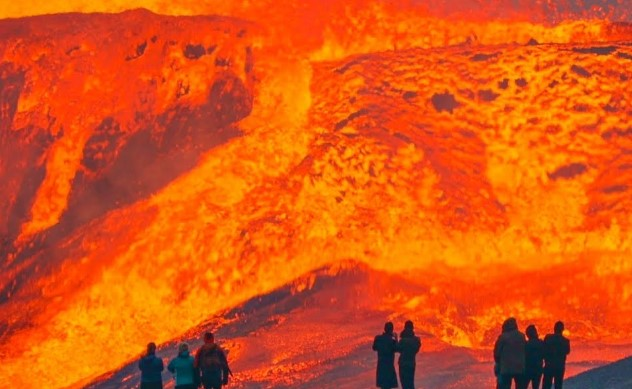

In [11]:
image_path = '/content/drive/My Drive/Assignment-2/Q1/test/lava25.jpg'
cv2_imshow(cv2.imread(image_path))

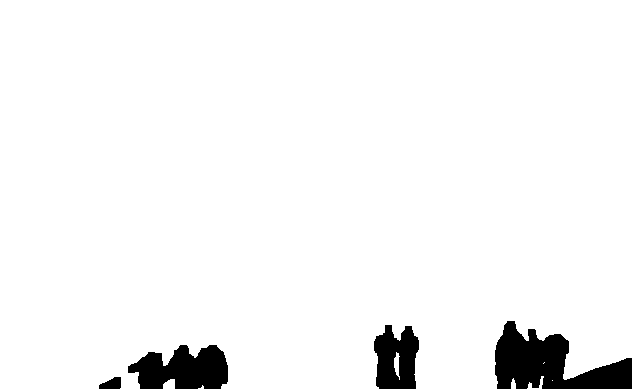

In [12]:
result = solution(image_path)
cv2_imshow(result)

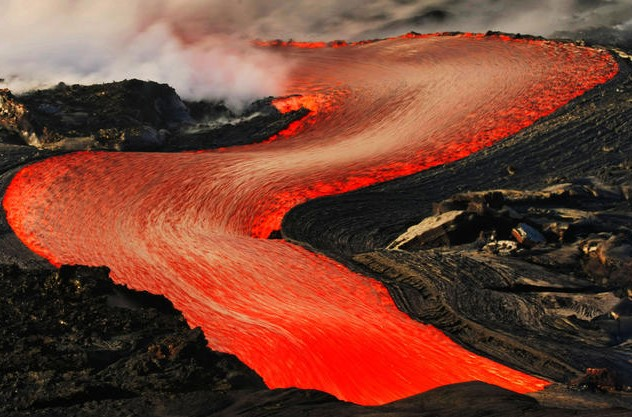

In [13]:
image_path = '/content/drive/My Drive/Assignment-2/Q1/test/lava21.jpg'
cv2_imshow(cv2.imread(image_path))

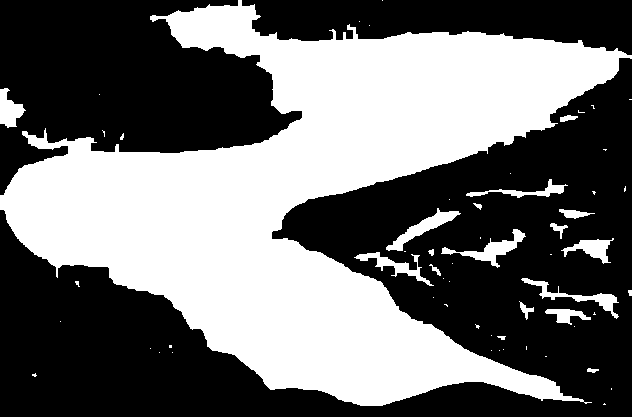

In [14]:
result = solution(image_path)
cv2_imshow(result)

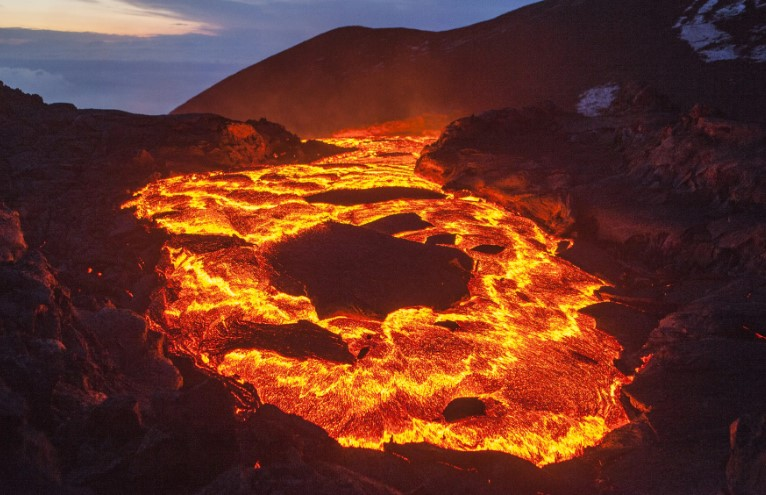

In [16]:
image_path = '/content/drive/My Drive/Assignment-2/Q1/test/lava20.jpg'
cv2_imshow(cv2.imread(image_path))

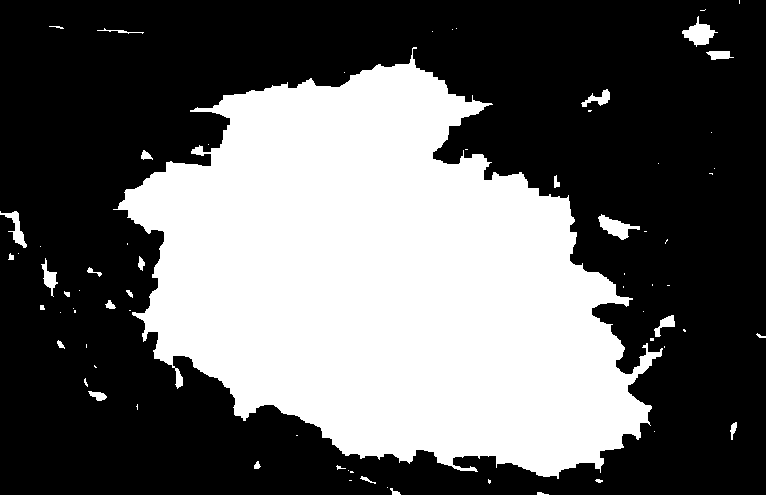

In [17]:
result = solution(image_path)
cv2_imshow(result)